### Exploratoy Data Analysis for Cars Price Prediction


EDA is used by data scientists to analyze datasets and sumarize their main characteristics, often employing data visualization methods.

The main purpose of EDA is to help look at data before making any assumptions. It can help identify abvious errors, as well as better understand patters within the data, detect outliers, find interesting relatons among the variables.

Based on the results of EDA in real wolrd, companies make business decisions to increase their profits.

EDA, Data Preprocessing and Feature Engineering are all distinct terms but they are comprised of a large number of subtasks that are overlapping in nature. At times, they are somtimes used in the same sentence as one onother.

EDA is a way to better understand your data which  helps in further Data preprocessing using feature engineering techniques.

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file
df = pd.read_csv('../Datasets/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Check the datatypes

In Machine Learning, it is very important to know appropriate datatypes of independant and dependant variable. As it provides the basis for selecting classification or regression models. Incorrect identification of data types leads to incorrect modeling which in turn leads to an incorrect solution.

In [3]:
#Check datatyps of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Dropping Duplicate Rows

Datasets that contain duplicates may contaminate training data with the test  data or vise versa, entries with missing values will lead models to missunderstand features and outliers will undermine the training process-leading your model to "learn" patterns that do not exist in reality

In [4]:
# Check for non-null values in each column
df.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [5]:
# Drop duplicate
df = df.drop_duplicates()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Check count of non-null values in each column
df.count()

name             6926
year             6926
selling_price    6926
km_driven        6926
fuel             6926
seller_type      6926
transmission     6926
owner            6926
mileage          6718
engine           6718
max_power        6721
torque           6717
seats            6718
dtype: int64

## Dropping missing values



In [7]:
## Check for count of null values in each column
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [8]:
# Drop missing value
df = df.dropna()

In [9]:
# make sure that missing values are removed
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## Feature Splitting

Splitting features is a good way to make them useful in terms of machine learning. Most of time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features: We enable machine learning algorithms to comprehend them.

In [10]:
# Split mileage, engine and ,max_power to remove its units and keep only numerical values
df['mileage']=df['mileage'].str.split(" ",expand=True)[0]
df['mileage']=df['mileage'].astype('float64')

df['engine']=df['engine'].str.split(" ",expand=True)[0]
df['engine']=df['engine'].astype('float64')

df['max_power']=df['max_power'].str.split(" ",expand=True)[0]
df['max_power']=df['max_power'].astype('float64')

In [11]:
# Feature splitting on brand names
df['brand'] = df['name'].str.split(" ",expand=True)[0] + ' ' + df['name'].str.split(" ",expand=True)[1]
df['brand'].value_counts()

brand
Maruti Swift       620
Maruti Alto        394
Hyundai i20        303
Maruti Wagon       245
Toyota Innova      188
                  ... 
Renault Koleos       1
Nissan Teana         1
Skoda Yeti           1
Force Gurkha         1
Maruti S-Presso      1
Name: count, Length: 200, dtype: int64

The **describe( )** function computes a summary of statistics realated to the DataFrame numerical columns. This function gives the mean,std and IQR values

In [12]:
# use decribe function
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


## Feature Creation

Sometimes we need to create new features so that our data makes more sense and it becomes easy for model to leran and intepret. Example, we have a coulumn 'year' which represents in which year, the acr was bought. But, if we create a new feature that shows how old the car is, it makes more sense then to use it to decide price  of a car for our model.

In [13]:
# Create  a new feature wich showa how old the car is 
current_year = 2022
df['old'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,old
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti Swift,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,15


## Dropping irrelevant columns

Useless columns can dangerously mislead our model that's why it is important to drop them.

In [14]:
# drop name, year and torque column
cols_to_drop = ['name','year','torque']
df.drop(cols_to_drop, axis=1,inplace=True)

## Renaming the columns

You can rename the column in Pandas dataframe using th df.rename(columns={"old column name":"new column name", inplace=True}) statement.
Example, here rename the following columns.
'slling_price':'price', 'km_driven':'kms','seller_type':'sller','max_power':'power'

In [15]:
# rename the columns as shown above
renamed_columns = {'selling_price':'price', 'km_driven':'kms','seller_type':'seller','max_power':'power'}
df = df.rename(columns = renamed_columns)
df.head()

,price,kms,fuel,seller,transmission,owner,mileage,engine,power,seats,brand,old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti Swift,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda City,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai i20,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti Swift,15


## Handling Outliers 

In [16]:
# Show df columns with numerical datatypes
df.loc[:, df.dtypes!=object]

,price,kms,mileage,engine,power,seats,old
0,450000,145500,23.40,1248.0,74.00,5.0,8
1,370000,120000,21.14,1498.0,103.52,5.0,8
2,158000,140000,17.70,1497.0,78.00,5.0,16
3,225000,127000,23.00,1396.0,90.00,5.0,12
4,130000,120000,16.10,1298.0,88.20,5.0,15
...,...,...,...,...,...,...,...
8121,260000,50000,18.90,998.0,67.10,5.0,9
8122,475000,80000,22.54,1396.0,88.73,5.0,8
8123,320000,110000,18.50,1197.0,82.85,5.0,9
8124,135000,119000,16.80,1493.0,110.00,5.0,15


## Boxplot for outliers

* A boxplot is a graph that gives you a good indication of how the values in the data are spread out.
* They are generally used to visualise outliers in the data

## Boxplot - price

As it is our target column, and outliers in target columns are sometimes important to understand the trend, that's why we are going to keep putliers here, but for other independent columns, we'll remove the outliers.

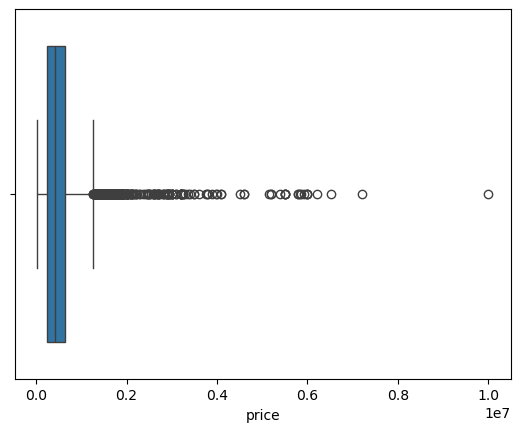

In [17]:
# Show the boxplot for price column to look outliers
import matplotlib.pyplot as plt
sns.boxplot(x = df['price'])
plt.show()

## old- hadling outliers

Now we will apply handling outliers for **old** column using Capping the outliers method that we lerant in feature engineering module.

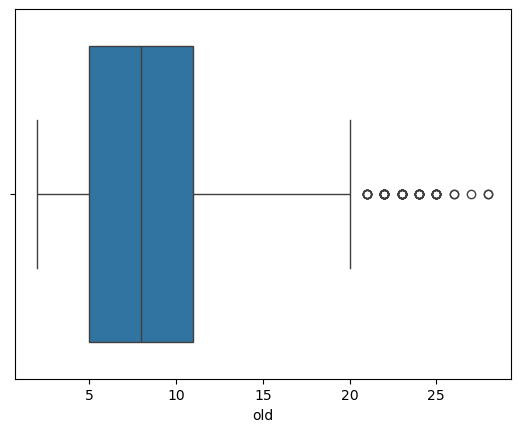

In [18]:
# Show the boxplot for price old column to look at outliers
sns.boxplot(x=df['old'])
plt.show()

In [19]:
# set the upper limit and lower and apply it for outliers
upper_limit = df['old'].quantile(0.95)
lower_limit = df['old'].quantile(0.05)
df.loc[(df['old']>upper_limit),'old'] = upper_limit
df.loc[(df['old']<lower_limit),'old'] = lower_limit

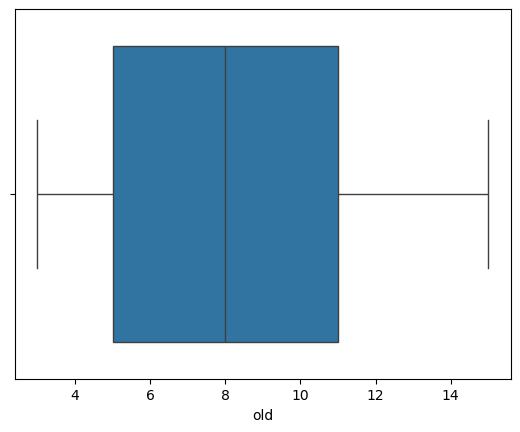

In [20]:
sns.boxplot(x=df['old'])
plt.show()

## Power-handling outliers

Repeat the same method for "power" column

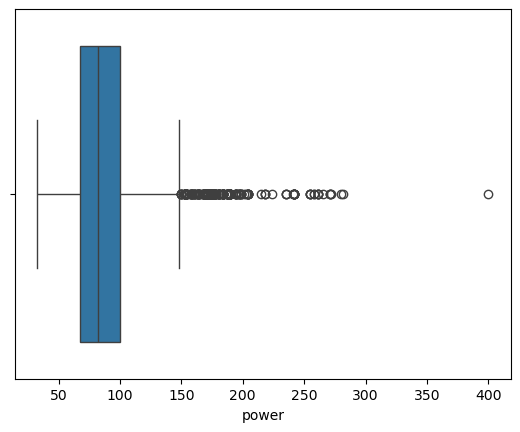

In [21]:
# Show the boxplot for "power" column to look outliers
sns.boxplot(x=df['power'])
plt.show()

In [22]:
# set the upper limit and lower and apply it for outliers
upper_limit = df['power'].quantile(0.95)
lower_limit = df['power'].quantile(0.05)
df.loc[(df['power']>upper_limit),'power'] = upper_limit
df.loc[(df['power']<lower_limit),'power'] = lower_limit

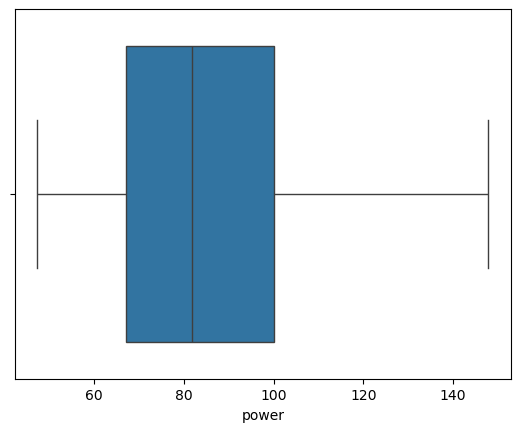

In [23]:
sns.boxplot(x=df['power'])
plt.show()

## KMS- hadling outliers

Now we will apply handling outliers for **kms** column using Capping the outliers method that we lerant in feature engineering module.

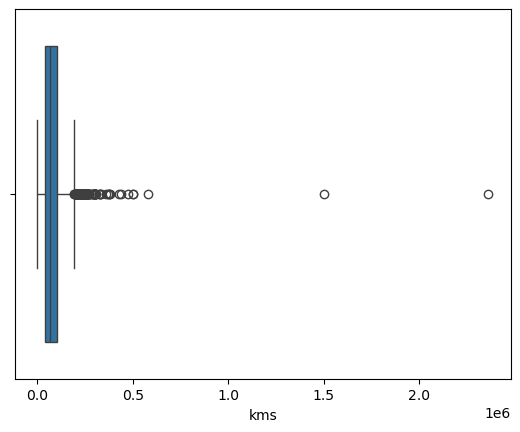

In [24]:
# Show the boxplot for "power" column to look outliers
sns.boxplot(x=df['kms'])
plt.show()

In [25]:
# set the upper limit and lower and apply it for outliers
upper_limit = df['kms'].quantile(0.95)
lower_limit = df['kms'].quantile(0.05)
df.loc[(df['kms']>upper_limit),'kms'] = upper_limit
df.loc[(df['kms']<lower_limit),'kms'] = lower_limit

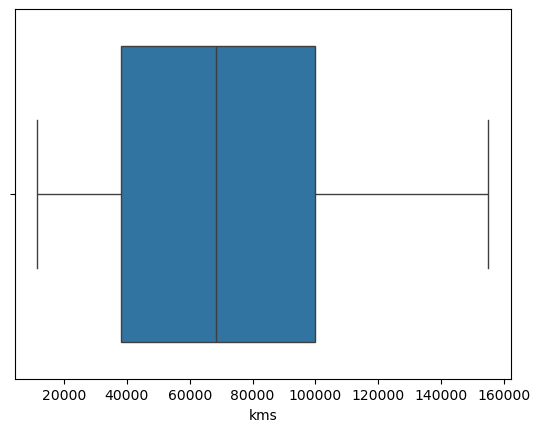

In [26]:
# Show the boxplot for "kms" column and observe the change
sns.boxplot(x=df['kms'])
plt.show()

In this module we'll learn new handling Outlier's mMethod

## Inter Quantile Range(IQR)

The intert quartile range defines the difference between the third and the first quantile. Quartiles are the positioned values that devide the whole series into 4 equal parts. So, there are 3 quartiles. First Quartile is demoted by Q1 known as the lower quartile, the second Quartile is denoted by Q2 and the third Quartile is denoted by Q3 known as the upper quartile. Therefore, interquartile range is equal to the upper quartile minus lower quartile.

Steps to eliminate outliers are:

* Sort the dataset in ascending order
* Calculate the 1st and 3rd quartile(Q1,Q2)
* Compute IQR=Q3-Q1
* Give a suitable threshold and compute lower bound = (Q1-1.5*IQR), upper bound = (Q3 + 1.5*IQR)
* Eliminate those above lower bound and  upper bound 


## Engine - handling outliers

In [27]:
# Show the boxplot for "Engine" column
q1 = df['engine'].quantile(0.25)
q3 = df['engine'].quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
df = df[~((df['engine']<lower_bound) | (df['engine']>upper_bound))]

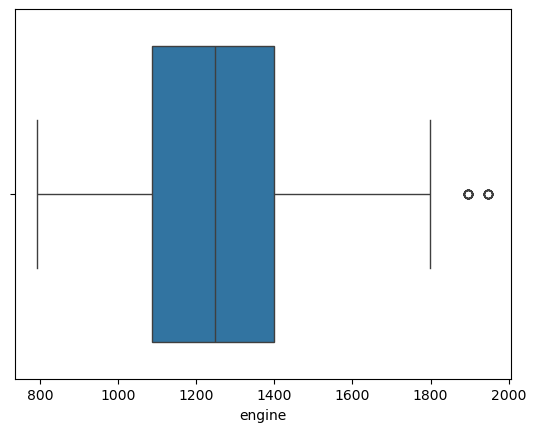

In [28]:
# Show the boxplot fro 'engine' ,column and oberve the change
sns.boxplot(x=df['engine'])
plt.show()

## DataFrame index

Indexing in pandas means simply selecting particular rows and columns of data from DataFrame. We try to keep it as much uniform and as much easily accessible for us to use. That's why i's important to clean irregular DataFrame indexes.

In [29]:
#Check the index of dataframe
df.tail()

,price,kms,fuel,seller,transmission,owner,mileage,engine,power,seats,brand,old
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti Wagon,9
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai i20,8
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai i20,9
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai Verna,15
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti Swift,13


As you can see, the dataframe index is irregular above, ranges from 0 to 8125, yet has length of 5477. That's why it is important to correct our dataframe index.

In [30]:
# reset the index
"""
reset_index will delete the index instead of inserting it back into the columns of the Dataframe.\n
 If we don't do drop=True, then it will create a column in our df which wil contain the old index values
"""
df.reset_index(inplace=True,drop=True)
df.index

RangeIndex(start=0, stop=5510, step=1)

## Data visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. It helps data scientists perform complex data analysis, reconizing patterns, and understanding datasets.

## Useful packages for cisualization in python

### Matplotlib
Matplotlib is a visualization library in Python for 2D plots of arrays. If is written in Python amd makes use of the Numpy library. Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. Which can help us deep-drive, in to understanding trends, correlations.

### Seaborn
Seaborn is a dataset-oriented library for making statistical representations in Python. It is developed on top of matplotlib and to create different visualizations. It's integrated with pandas structures.

## Visualizing Univariate Distributions
* Univariate data visualization plots help us to analyse and understand the properties of a particular column(variable) in our dataset.
* Univariate analysis is basically the simplest from to analyze data. Uni means one and this means that the data has only one kind of variable.
* The major reason for univariate analysis is to use data to describe. The analysis will take data, summarise it,and then find some pattern in the data

1. Histogram & DesnsityPlots
* Creating the histogram provides the visual representation of data distribution.
* By using a historam we can represent a large amount of data, and its frequency.
* Density Plot is the continuous and smoothed version of the histogram estimated from the data



C:\Users\LABO-INFOS\AppData\Local\Temp\ipykernel_20460\2453870405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['power'])


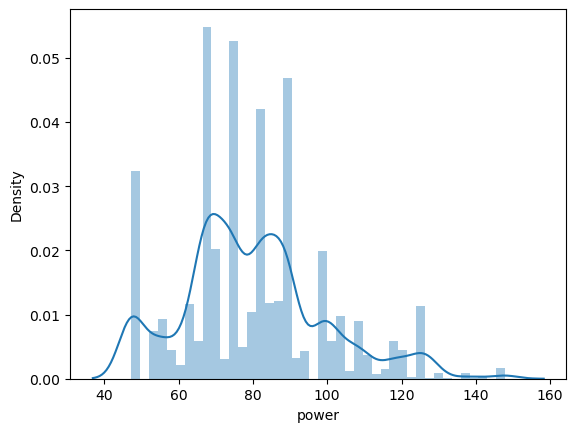

In [31]:
# Plot a histogram for "power" column
sns.distplot(df['power'])
plt.show()

## Plot all the numerical columns together present in our dataset

In [32]:
# Make a list of all columns which contain numerical values
nums_cols = list(df.loc[:,df.dtypes!=object].columns)
nums_cols

['price', 'kms', 'mileage', 'engine', 'power', 'seats', 'old']

C:\Users\LABO-INFOS\AppData\Local\Temp\ipykernel_20460\2654029820.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\LABO-INFOS\AppData\Local\Temp\ipykernel_20460\2654029820.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\LABO-INFOS\AppData\Local\Temp\ipykern

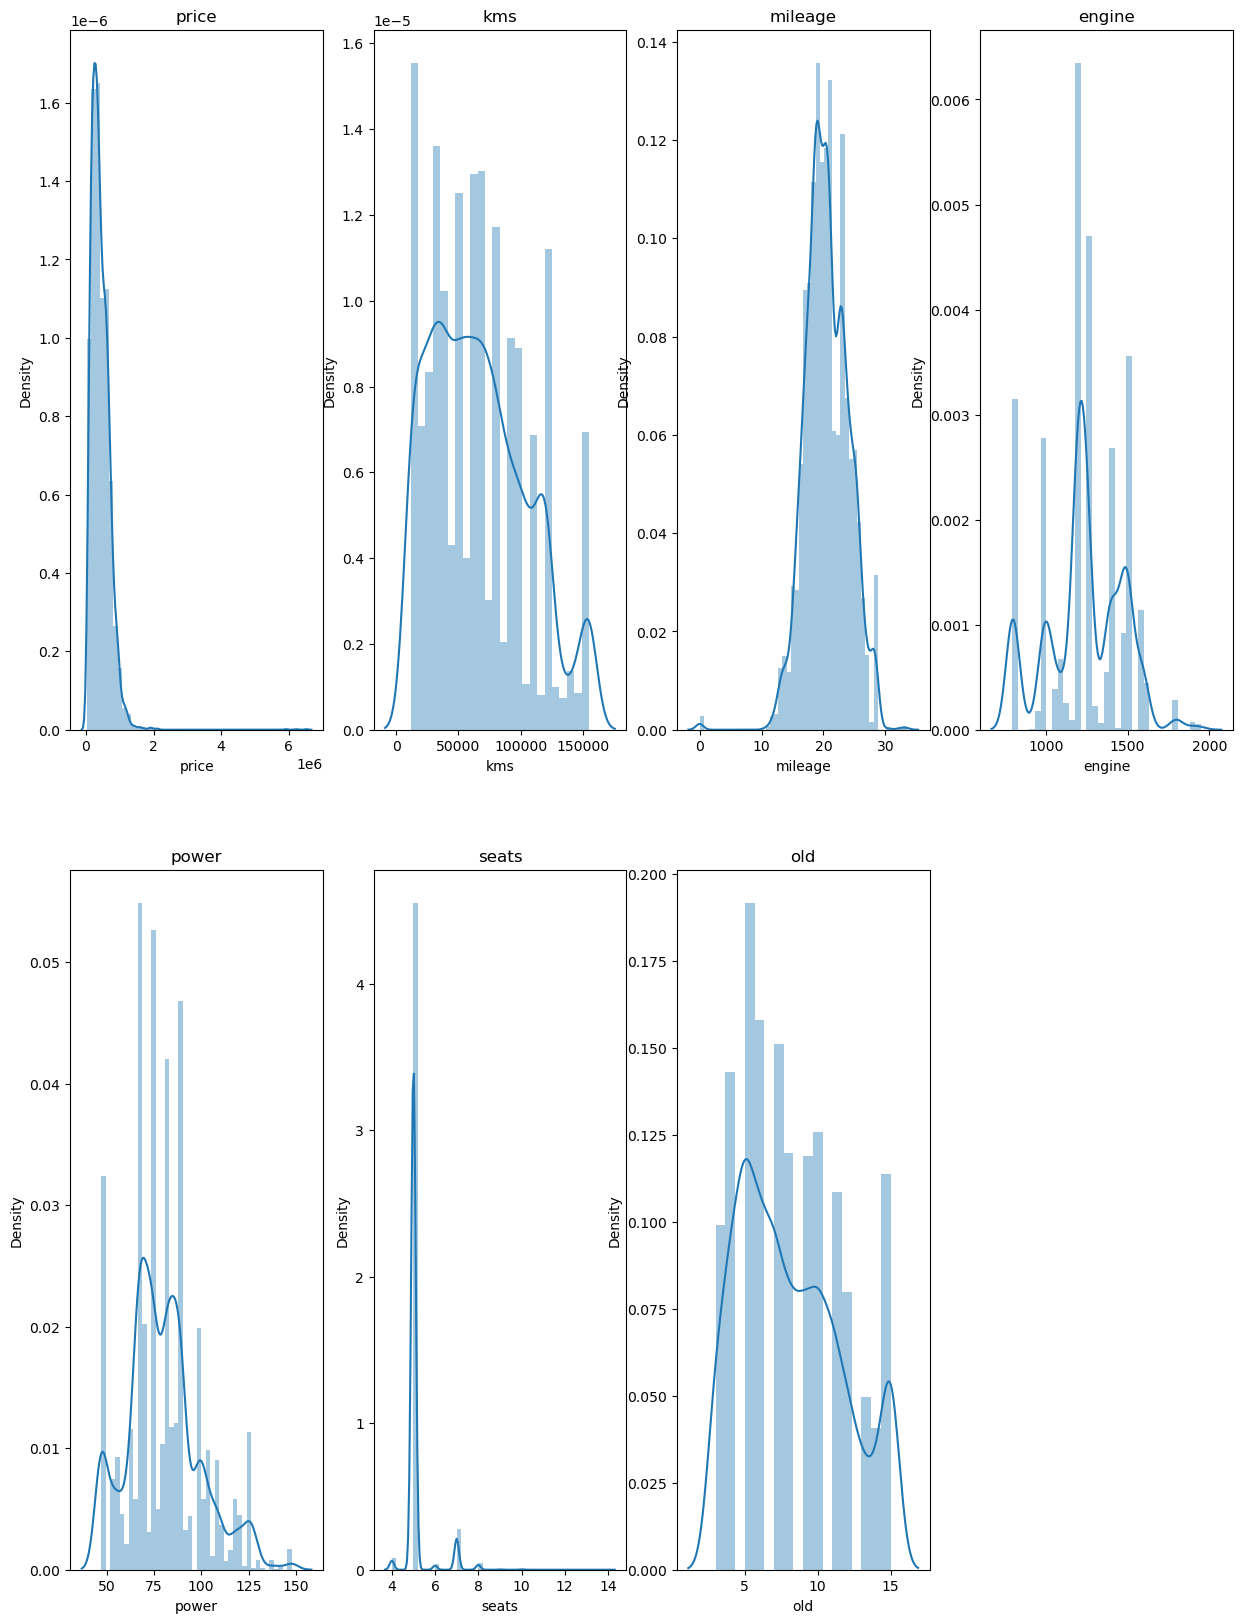

In [33]:
# Plot all the columns in nums_cols together using subplot of dimension(2,3)
c=0
plt.figure(figsize=(15,20))
for i in nums_cols:
    c = c + 1
    plt.subplot(2,4,c)
    plt.title(i)
    sns.distplot(df[i])
plt.show()

2. Bar Plot
* A barplo(or barchat) is one of the most common types of graphic.
* It shows the relationship between a numerica and categorical variable. Each entity of the categoric variable is represented as a later
* The size of the bar represents its numuric value.

Text(0.5, 0, 'Brand name')

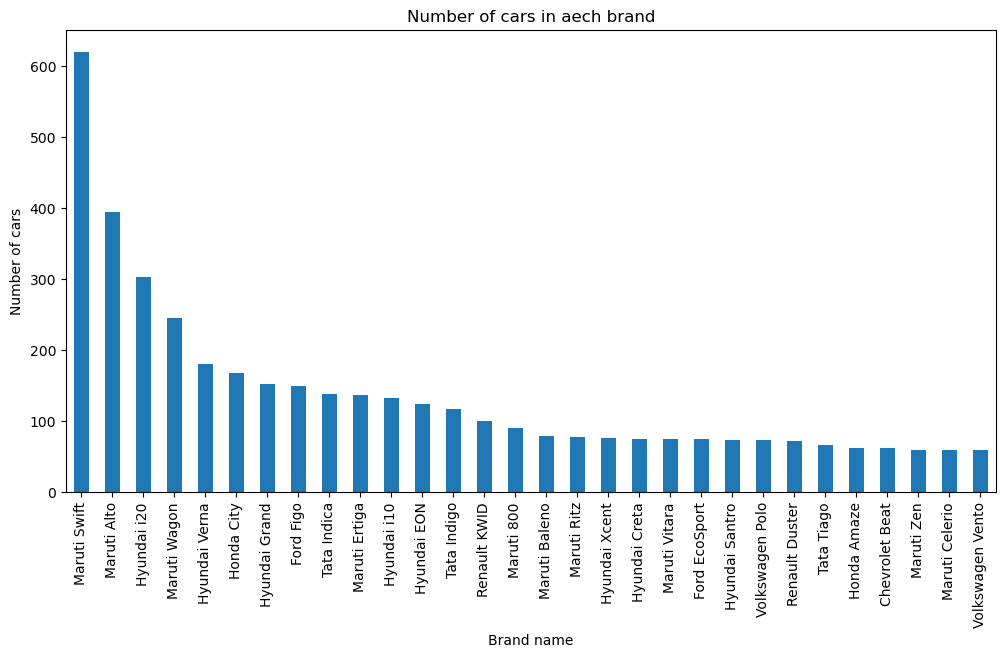

In [34]:
# Plot a bar graph for number of cars vs each brand
plt.figure(figsize=(12,8))
df.brand.value_counts().nlargest(30).plot(kind='bar',figsize=(12,6))
plt.title('Number of cars in aech brand')
plt.ylabel('Number of cars')
plt.xlabel('Brand name')

3. Count Plot
* A countplot is kind of like a histogram or bar graph used for categorical data
* It simply shows the number of occurrences(frequency) of a different classes present in the column

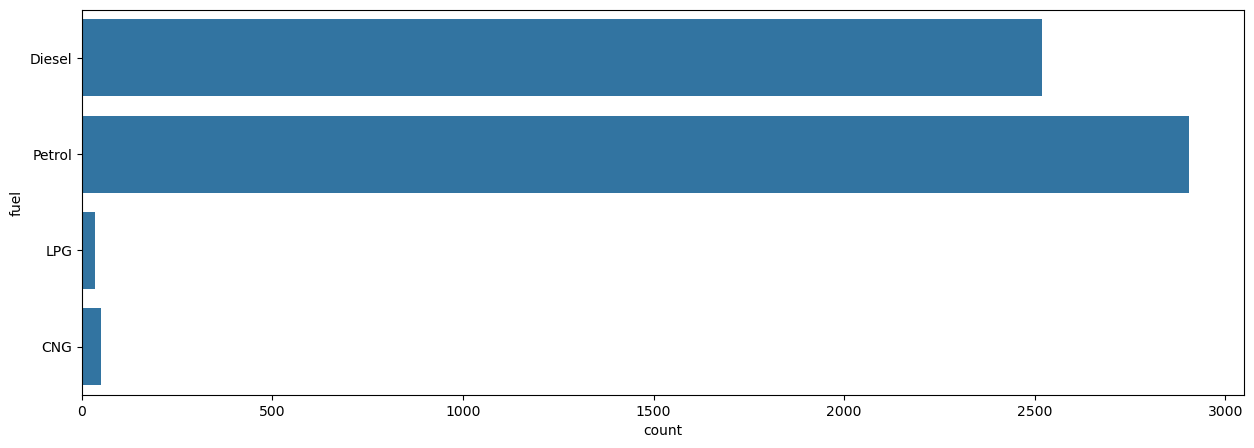

In [35]:
# Show a countplot for "fuel" column
plt.figure(figsize=(15,5))
sns.countplot(df['fuel'])
plt.show()

4. Pie Plot
* Pie plot or pie charts are used to present categorical data in a format that highlights how each data point contributes to a whole, that is 100%
* It is a circula statistcal graphical chart devided into slices that illustrate numerical proportions in data.

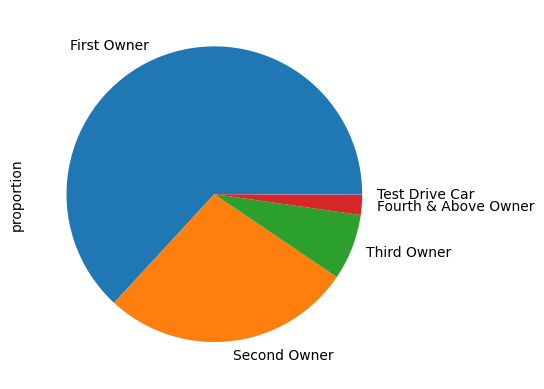

In [36]:
# Plot the pie chart of seller categories
df.owner.value_counts(normalize=True).plot.pie()
plt.show()

## Visualize Bivariate Distributions
* Bivariate analysis means the analysis of bivariate data, bi means two, so analysis two variables.
* It is one of the simplest forms of statistical analysis, where two variables are observed against each other.
* Analysing two variables(or column) can help us determine the relationships between them.

1. Scatter Plot
* A scatter plot uses dots to represent values for teo different numeric variables(or columns)
* The position of each dot on the horizontal and vertical axis (X and Y axis) and points are plot accorinding to that is how scatter plots are used  to observe relationships between these 2 variables.  

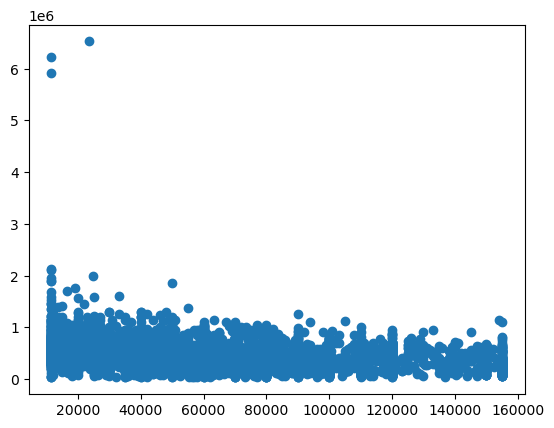

In [37]:
# Plot the scatter plot of price and kms variable in data
plt.scatter(df.kms, df.price)
plt.show()

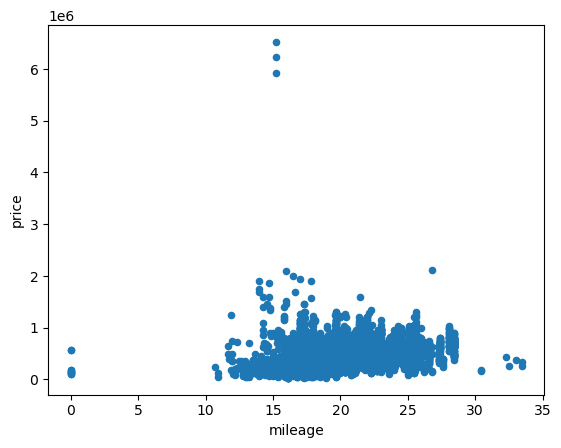

In [38]:
# Plot the scatter plot of prie and mileage variable in data
df.plot.scatter(x='mileage',y='price')
plt.show()

2. Lone Plot
* A line plot makes a line to represent values for two different numeric variable(or columns)
* One column is on horizontal axis and another on vertical  axis(x and y axis) and points are plot accorinding to this axis.

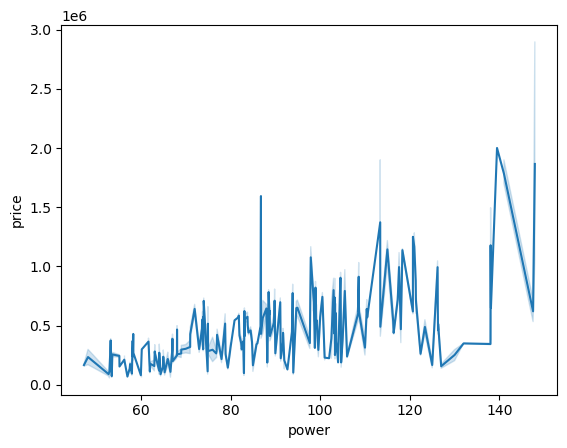

In [39]:
# Show a lineplot for "price" vs "power"
sns.lineplot(x='power',y='price',data=df)
plt.show()

3. Box Plot
We use this plots earlier for detecting outliers. That was an example of univariate analysis, but we will see now how we can use it for bivariate analysis.
* Boxplot is a chart that is used to visualize how a given data(variable) is distributed using quartiles.
* It makes comparing characteristics of data between categories very easy.
* We can compare the medians, spread of data, outliers and skewness for different categories in just on figure.

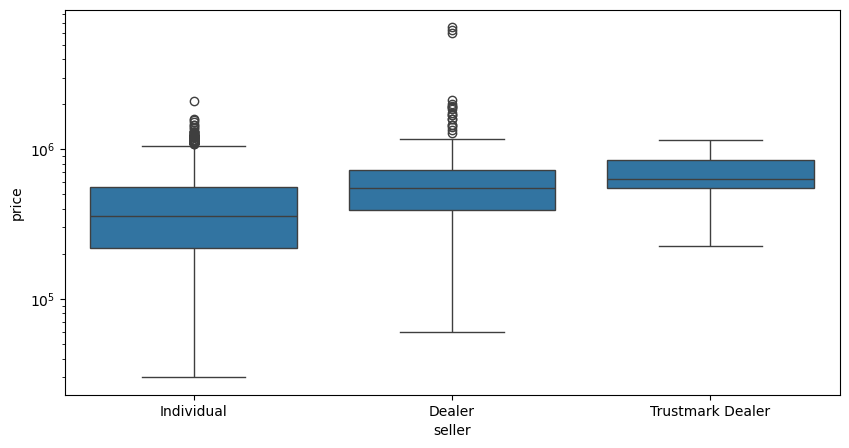

In [40]:
# boxplot of 'price' vs 'seller'
plt.figure(figsize=(10,5))
sns.boxplot(x='seller',y='price',data=df)
plt.yscale('log')
plt.show()

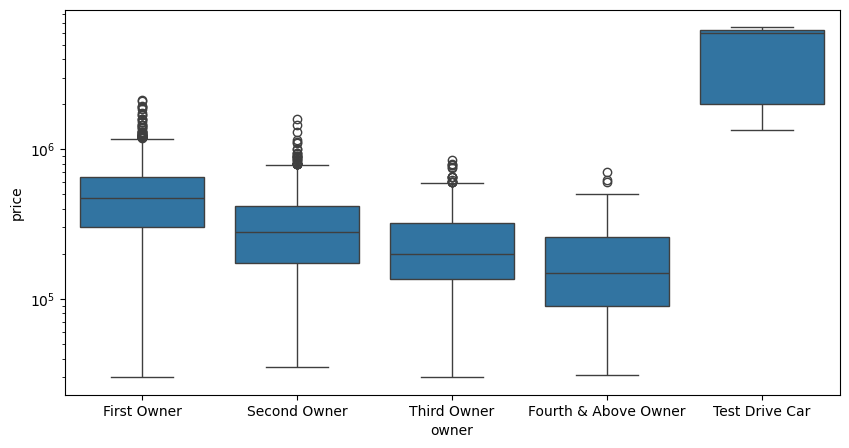

In [41]:
# boxplot of 'price' vs 'owner'
plt.figure(figsize=(10,5))
sns.boxplot(x='owner',y='price',data=df)
plt.yscale('log')
plt.show()

4. Violin Plot

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full sistribution of the data.
* A violin plot is a hybrid of a box and kernel density plot, which shows distributions of numeric data for one or more groups using density curves.
* It shows the distribution of quantitative data across several levels of one (or more)  categorical variables such that those distributions can be compared.
Violin Plot = Box Plot + Distribution/Density Plot

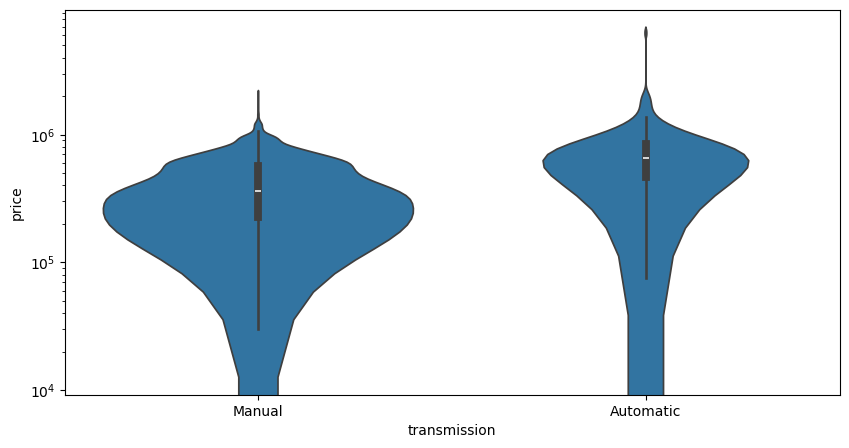

In [42]:
# Violinplot of 'price' vs 'transmission'
plt.figure(figsize=(10,5))
sns.violinplot(x='transmission',y='price',data=df)
plt.yscale('log')
plt.show()

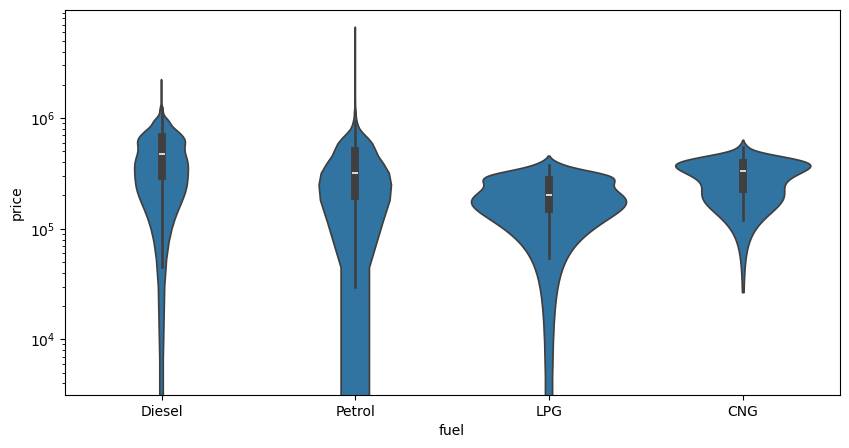

In [43]:
# Violinplot of 'price' vs 'fuel'
plt.figure(figsize=(10,5))
sns.violinplot(x='fuel',y='price',data=df)
plt.yscale('log')
plt.show()

5. Joint Plot

* Jointplot can be used to quickly visualize and anlyze the realtionship between two variables and describe their individual distributions on the same plot

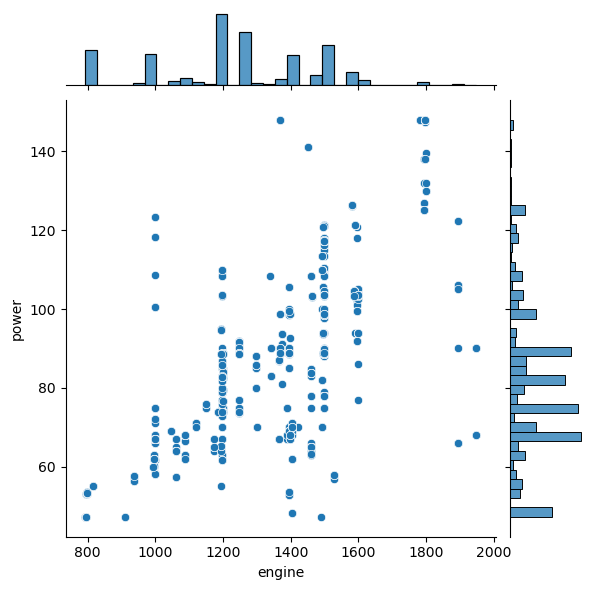

In [44]:
# Joint plot of engine and power
sns.jointplot(x='engine', y='power', data=df)
plt.show()

Another way of visualizing a bivariate relationship using joint plot, in particular when we have a large amount of data, is the hexplot. A hexplot splits the plotting window into several hexbins and then number of observations wihch fall int each bin corresponds with a color to indicate density. A darker color color hexbin means that there are more observations, or more density, within that region.

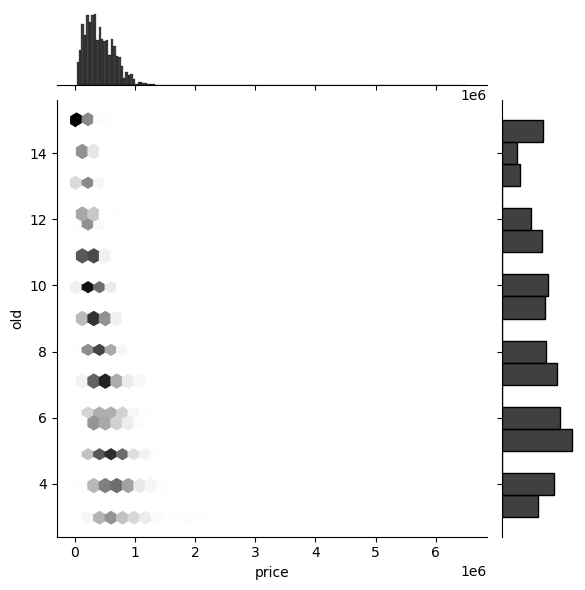

In [45]:
# Joint plot of price and old
sns.jointplot(x='price', y='old', data=df,kind='hex',color='k')
plt.show()

## Visualizing Multivariate Distributions
* Multivariate analysis is where we analyze multiple data dimensions or attributes(2 or more)
* Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correleations amongst these attributes.
* You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.

## 1. Pair Plot
* A pairplot plot a pairwise relationships in datadet.
* A pairs plot allows us to see both sistribution of single variables and relationships between two variables.
* The pairplot function creates a grid of axes such that each variable in the data will by shared in the y-axis across a single row and in the x-axis across a single column.

C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


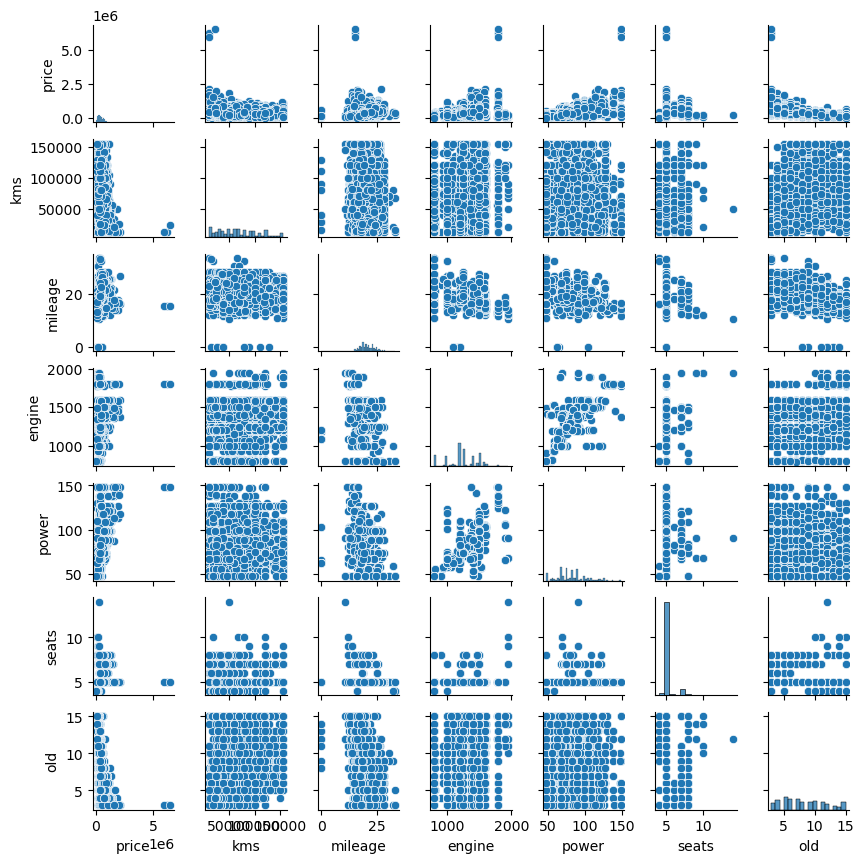

In [46]:
# plot the pairplot for data df
sns.pairplot(df,size=1.25)
plt.show()

C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LABO-INFOS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


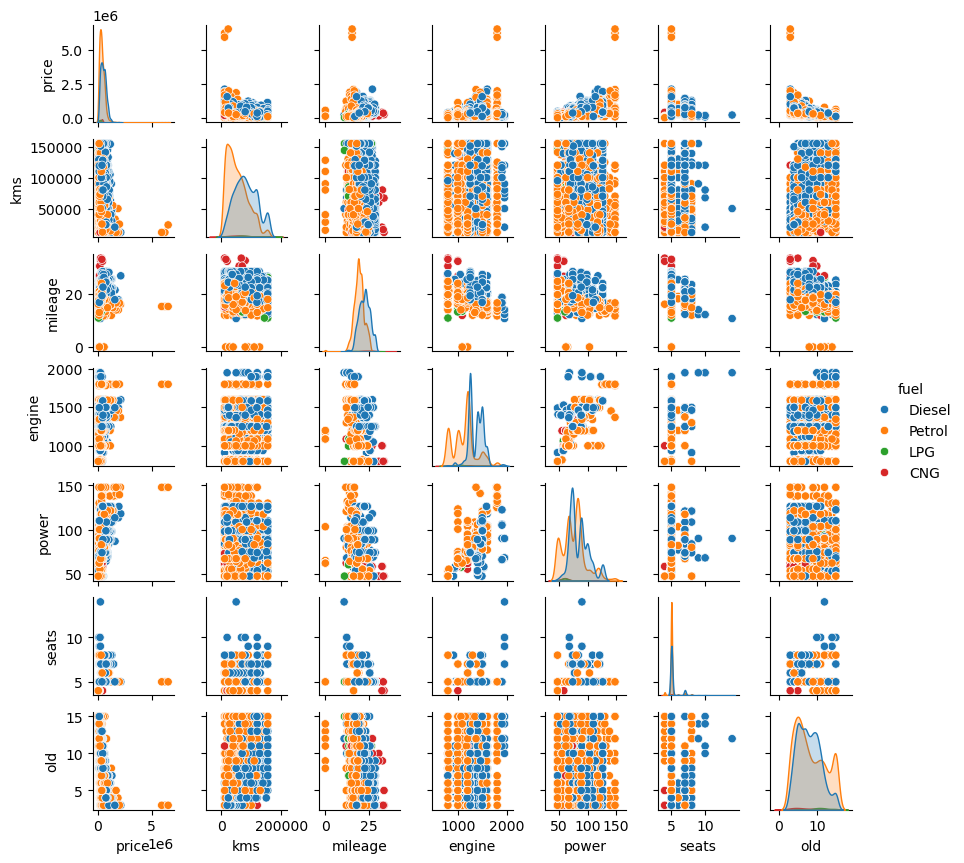

In [47]:
# plot the pairplot for data df with hue transmission
sns.pairplot(df,hue='fuel',size=1.25)
plt.show()

## 2. Multivariates scatter Plot

* This kind of scatterplot uses three visual variables(2 nueric and 1 categorical).
* The horizontal position (x-value) and the vertical position (y-value) tracks values for two different numeric varabless (or columns).
* And the color (the hue parameter) tracks which of the categories from categorical column the point represents is in.
* Simiar to scatter plot, we can observe relationship between 2 columns but now, with respect to each category.

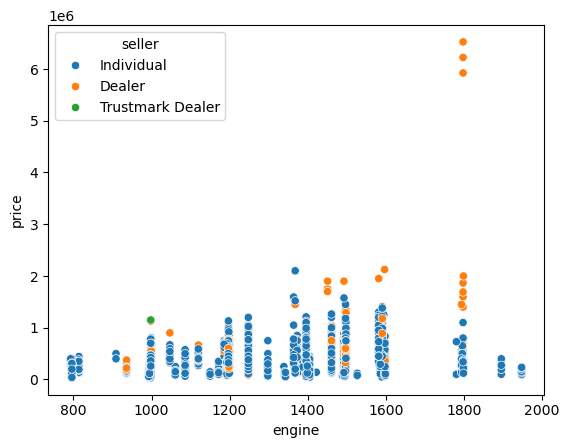

In [48]:
# multivariate scatterplot using seaborn
sns.scatterplot(x=df.engine, y=df.price, hue=df.seller)
plt.show()

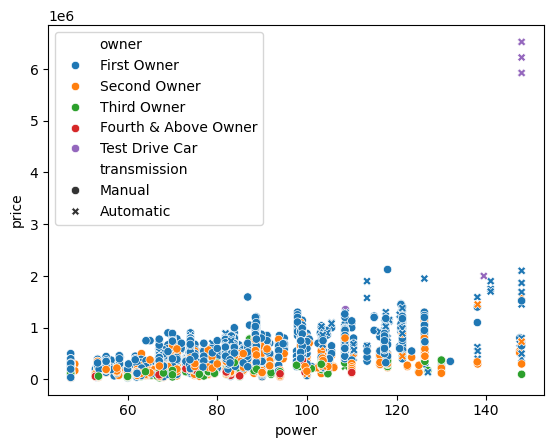

In [49]:
# multivariate scatterplot using seaborn
sns.scatterplot(x='power', y='price', hue='owner', style='transmission',data=df)
plt.show()

## 3. Multivariate Bar Plot

* This kind of barplot uses three visual variables(1 numerical and categorical)
* This works similar to Bar graph, but in addition, the previous variables is segmented to observe relationship with respect to another variable used as hue.

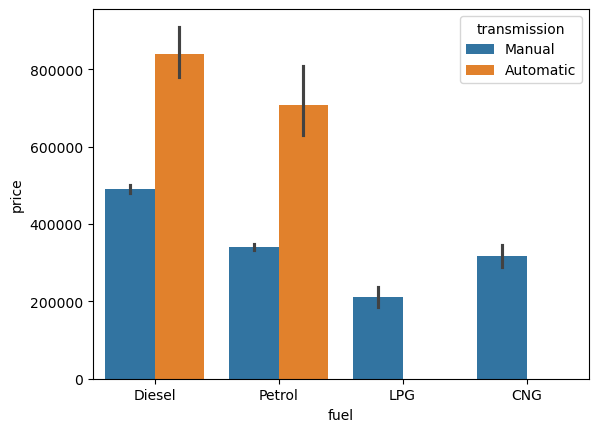

In [50]:
#Show barplot for  "price" vs "fuel" and show them separately for each transmission type
"""
Hue means a color or shade so, here hue="column name " means provide dtatapoints with different color 
for different classes of "column name"
"""
sns.barplot(x=df['fuel'],y=df['price'],hue=df['transmission'])
plt.show()

4. Heatmaps

* A heatmap is a graphical representation of data that users system of color-coding to represent different values.
* A correlation heatmap is a graphical representation of a correlation matrix representing the cprrelation between different variables. The value of correlation can take any value from -1 to 1.
* The color of the cell is proportional to the value representing the relation between those two variables. This means that when you look at your heatmap, you can quickly see which variables are highly correlated and which aren't.

In [53]:
# find the correlation of features of the data 
#df_encoded = pd.get_dummies(df)
#train_corr = df_encoded.corr()

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlation
train_corr = df_numeric.corr()
train_corr

,price,kms,mileage,engine,power,seats,old
price,1.000000,-0.320445,0.211300,0.390253,0.561871,0.151727,-0.646758
kms,-0.320445,1.000000,-0.082084,0.216291,0.001541,0.020070,0.520064
mileage,0.211300,-0.082084,1.000000,-0.134598,-0.129814,-0.082582,-0.427861
engine,0.390253,0.216291,-0.134598,1.000000,0.805521,0.159076,-0.044090
power,0.561871,0.001541,-0.129814,0.805521,1.000000,0.106191,-0.218850
seats,0.151727,0.020070,-0.082582,0.159076,0.106191,1.000000,-0.148148
old,-0.646758,0.520064,-0.427861,-0.044090,-0.218850,-0.148148,1.000000


Text(0.5, 1.0, 'Simple heatmap')

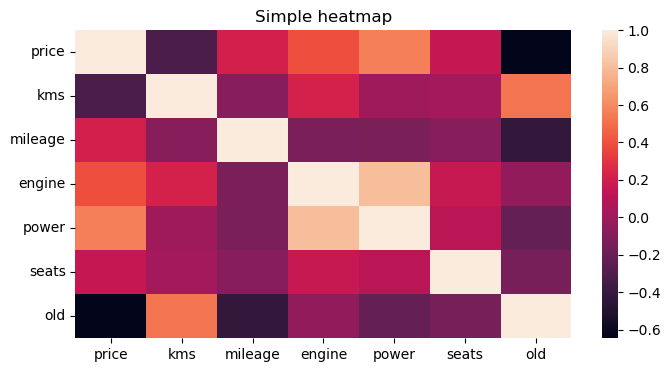

In [54]:
# Plot  a simple heatmap using the correlation found above
fig,ax = plt.subplots(figsize=(8,4))
sns.heatmap(train_corr)
ax.set_title('Simple heatmap')

Text(0.5, 1.0, 'Camp2')

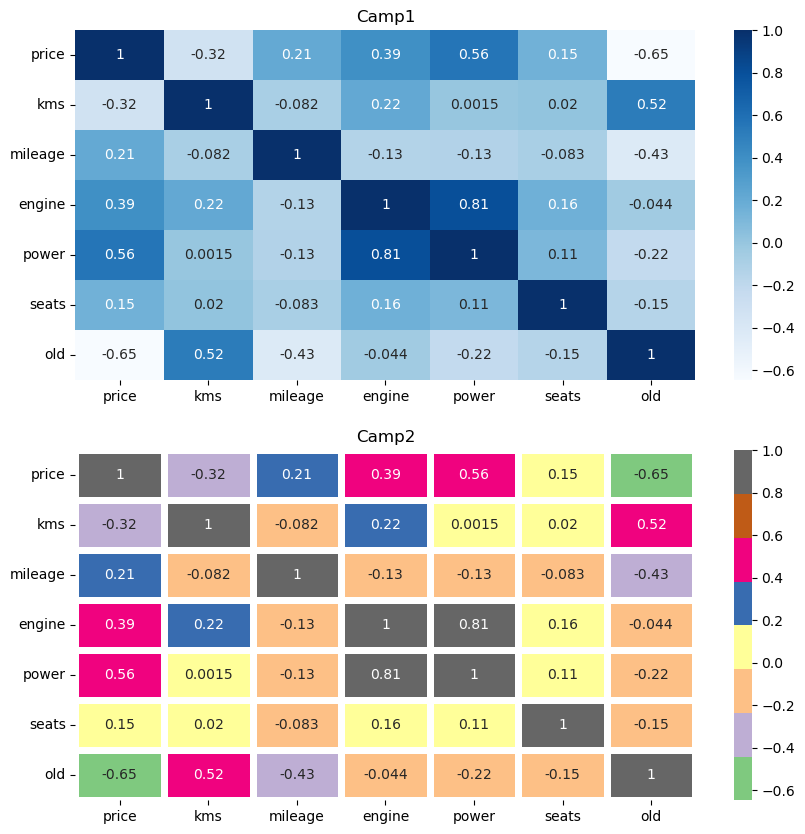

In [55]:
# Plot variants of heatmaps using different parameter of sns.heatmap
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap='Blues')
sns.heatmap(train_corr,annot=True,ax=ax2,linewidth=5,cmap='Accent')
ax1.set_title('Camp1')
ax2.set_title('Camp2')